In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
from string import punctuation
from wordcloud import WordCloud, STOPWORDS

In [176]:
df1=pd.read_csv('A:/QTI/DUMMY APRIL.csv', delimiter=";")
df2=pd.read_csv('A:/QTI/DUMMY MEI.csv', delimiter=";")
df3=pd.read_csv('A:/QTI/DUMMY JUNI.csv', delimiter=";",encoding='cp1252')

# Cleansing dan Praproses

In [191]:
df=df1.append(df2)
df=df.append(df3)
df.head()

,Cnote no,Date,Services,Weight,Qty,Destination,Shipper/ Cust Id,Shipper Name,Shipper Phone,Receiver Name,Receiver Phone,Goods desc,Insurance,Payment type,Amount,Pajak,"User id,,,,","User id,,,","User id,,"
0,'023250023914220,04/01/2020 15:48,REG19,4,1,"CIKARANG PUSAT ,CIKA",BUNK,JELLYBEE,'+628112299193,MIMIN MINTARSIHTOKO KOSMETIK,'89672703274,SHOPEE LOGISTIC,0,Cash,48,0,"RIZK_BDO,,,",NaN,NaN
1,'023250023923120,04/01/2020 16:09,OKE19,1,1,"CIPONDOH , TANGERANG",GG,GENIUSGROSIR,'+628976707006,SUNDARI MELINDA,'83893134502,SHOPEE LOGISTIC,0,Cash,10,0,"RIZK_BDO,,,",NaN,NaN
2,'023250022107120,04/01/2020 16:10,OKE19,1,1,"NATAR, KAB.LAMPUNG",GG,GENIUSGROSIR,'+628976707006,RENATA,'85357200657,SHOPEE LOGISTIC,0,Cash,18,0,"RIZK_BDO,,,",NaN,NaN
3,'023250023944620,04/01/2020 16:17,OKE19,7,1,"BANYURESMI,GARUT",GG,JICAL,'+628112388108,IBU LALA PAK SAWIN,'89663343951,SHOPEE LOGISTIC,0,Cash,77,0,"RIZK_BDO,,,",NaN,NaN
4,'023250023947320,04/01/2020 16:17,OKE19,1,1,"JABON,SIDOARJO",JOPP,JULMAN HIRAWAN,'+6287722216098,HILDA IZZATI,'81334811841,SHOPEE LOGISTIC,0,Cash,17,0,"RIZK_BDO,,,",NaN,NaN


In [252]:
df['Date'] = pd.DatetimeIndex(df['Date']).date
df.head()

,Cnote no,Date,Services,Weight,Qty,Destination,Shipper/ Cust Id,Shipper Name,Receiver Name,Goods desc,Insurance,Payment type,Amount,Pajak,Month,total_amount
0,023250023914220,2020-04-01,REG,4,1,cikarang,BUNK,JELLYBEE,MIMIN MINTARSIHTOKO KOSMETIK,shopee logistic,0.0,Cash,48.0,0,April,48.0
1,023250023923120,2020-04-01,OKE,1,1,cipondoh,GG,GENIUSGROSIR,SUNDARI MELINDA,shopee logistic,0.0,Cash,10.0,0,April,10.0
2,023250022107120,2020-04-01,OKE,1,1,natar,GG,GENIUSGROSIR,RENATA,shopee logistic,0.0,Cash,18.0,0,April,18.0
3,023250023944620,2020-04-01,OKE,7,1,banyuresmi,GG,JICAL,IBU LALA PAK SAWIN,shopee logistic,0.0,Cash,77.0,0,April,77.0
4,023250023947320,2020-04-01,OKE,1,1,jabon,JOPP,JULMAN HIRAWAN,HILDA IZZATI,shopee logistic,0.0,Cash,17.0,0,April,17.0


In [208]:
df['Date']=df['Date'].astype(str)
m=[]
for i in df['Date']:
    if re.match(r'2020-04',i):
        m.append('April')
    elif re.match(r'2020-05',i):
        m.append('Mei')
    else:
        m.append('Juni')
df['Month']=m
df.head(5)

,Cnote no,Date,Services,Weight,Qty,Destination,Shipper/ Cust Id,Shipper Name,Receiver Name,Goods desc,Insurance,Payment type,Amount,Pajak,Month,total_amount
0,023250023914220,2020-04-01,REG,4,1,cikarang,BUNK,JELLYBEE,MIMIN MINTARSIHTOKO KOSMETIK,shopee logistic,0.0,Cash,48.0,0,April,48.0
1,023250023923120,2020-04-01,OKE,1,1,cipondoh,GG,GENIUSGROSIR,SUNDARI MELINDA,shopee logistic,0.0,Cash,10.0,0,April,10.0
2,023250022107120,2020-04-01,OKE,1,1,natar,GG,GENIUSGROSIR,RENATA,shopee logistic,0.0,Cash,18.0,0,April,18.0
3,023250023944620,2020-04-01,OKE,7,1,banyuresmi,GG,JICAL,IBU LALA PAK SAWIN,shopee logistic,0.0,Cash,77.0,0,April,77.0
4,023250023947320,2020-04-01,OKE,1,1,jabon,JOPP,JULMAN HIRAWAN,HILDA IZZATI,shopee logistic,0.0,Cash,17.0,0,April,17.0


In [196]:
df['Amount']=df['Amount'].apply(lambda x: re.sub(r',','.',str(x)))
df['Insurance']=df['Insurance'].apply(lambda x: re.sub(r',','.',str(x)))
df['Amount']=df['Amount'].astype(float)
df['Insurance']=df['Insurance'].astype(float)
df.head()

,Cnote no,Date,Services,Weight,Qty,Destination,Shipper/ Cust Id,Shipper Name,Shipper Phone,Receiver Name,Receiver Phone,Goods desc,Insurance,Payment type,Amount,Pajak,"User id,,,,","User id,,,","User id,,",Month
0,'023250023914220,2020-04-01,REG19,4,1,"CIKARANG PUSAT ,CIKA",BUNK,JELLYBEE,'+628112299193,MIMIN MINTARSIHTOKO KOSMETIK,'89672703274,SHOPEE LOGISTIC,0.0,Cash,48.0,0,"RIZK_BDO,,,",NaN,NaN,April
1,'023250023923120,2020-04-01,OKE19,1,1,"CIPONDOH , TANGERANG",GG,GENIUSGROSIR,'+628976707006,SUNDARI MELINDA,'83893134502,SHOPEE LOGISTIC,0.0,Cash,10.0,0,"RIZK_BDO,,,",NaN,NaN,April
2,'023250022107120,2020-04-01,OKE19,1,1,"NATAR, KAB.LAMPUNG",GG,GENIUSGROSIR,'+628976707006,RENATA,'85357200657,SHOPEE LOGISTIC,0.0,Cash,18.0,0,"RIZK_BDO,,,",NaN,NaN,April
3,'023250023944620,2020-04-01,OKE19,7,1,"BANYURESMI,GARUT",GG,JICAL,'+628112388108,IBU LALA PAK SAWIN,'89663343951,SHOPEE LOGISTIC,0.0,Cash,77.0,0,"RIZK_BDO,,,",NaN,NaN,April
4,'023250023947320,2020-04-01,OKE19,1,1,"JABON,SIDOARJO",JOPP,JULMAN HIRAWAN,'+6287722216098,HILDA IZZATI,'81334811841,SHOPEE LOGISTIC,0.0,Cash,17.0,0,"RIZK_BDO,,,",NaN,NaN,April


In [197]:
df['Services']=df['Services'].apply(lambda x: re.sub(r'\d+','',str(x)))
df['Services']=df['Services'].apply(lambda x: re.sub(r'[*]','',str(x)))
df['Services'].value_counts()

REG       9047
OKE       4867
JTR        508
YES        449
CTC        118
CTCYES       8
Name: Services, dtype: int64

In [198]:
df['Cnote no']=df['Cnote no'].apply(lambda x: re.sub(r"[']","",str(x)))
df.head()

,Cnote no,Date,Services,Weight,Qty,Destination,Shipper/ Cust Id,Shipper Name,Shipper Phone,Receiver Name,Receiver Phone,Goods desc,Insurance,Payment type,Amount,Pajak,"User id,,,,","User id,,,","User id,,",Month
0,023250023914220,2020-04-01,REG,4,1,"CIKARANG PUSAT ,CIKA",BUNK,JELLYBEE,'+628112299193,MIMIN MINTARSIHTOKO KOSMETIK,'89672703274,SHOPEE LOGISTIC,0.0,Cash,48.0,0,"RIZK_BDO,,,",NaN,NaN,April
1,023250023923120,2020-04-01,OKE,1,1,"CIPONDOH , TANGERANG",GG,GENIUSGROSIR,'+628976707006,SUNDARI MELINDA,'83893134502,SHOPEE LOGISTIC,0.0,Cash,10.0,0,"RIZK_BDO,,,",NaN,NaN,April
2,023250022107120,2020-04-01,OKE,1,1,"NATAR, KAB.LAMPUNG",GG,GENIUSGROSIR,'+628976707006,RENATA,'85357200657,SHOPEE LOGISTIC,0.0,Cash,18.0,0,"RIZK_BDO,,,",NaN,NaN,April
3,023250023944620,2020-04-01,OKE,7,1,"BANYURESMI,GARUT",GG,JICAL,'+628112388108,IBU LALA PAK SAWIN,'89663343951,SHOPEE LOGISTIC,0.0,Cash,77.0,0,"RIZK_BDO,,,",NaN,NaN,April
4,023250023947320,2020-04-01,OKE,1,1,"JABON,SIDOARJO",JOPP,JULMAN HIRAWAN,'+6287722216098,HILDA IZZATI,'81334811841,SHOPEE LOGISTIC,0.0,Cash,17.0,0,"RIZK_BDO,,,",NaN,NaN,April


In [199]:
def cleansing(data):
    data=data.lower()
    remove=string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data=data.translate(translator)
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'', data)
    data = data.replace('\n',' ')
    data = re.sub(r'\d+','',data)
    data=" ".join(data.split())
    data = re.sub(r'#\w*', '', data)
    data = re.sub(r'\b\w{1,2}\b', '', data)
    return data

isi = []
for index, row in df.iterrows():
    isi.append(cleansing(row["Goods desc"]))
df["Goods desc"] = isi
df['Goods desc']=df['Goods desc'].apply(lambda x: re.sub(r'tissue','tisu',str(x)))
df['Goods desc']=df['Goods desc'].apply(lambda x: re.sub(r'tissu','tisu',str(x)))
df.head()

,Cnote no,Date,Services,Weight,Qty,Destination,Shipper/ Cust Id,Shipper Name,Shipper Phone,Receiver Name,Receiver Phone,Goods desc,Insurance,Payment type,Amount,Pajak,"User id,,,,","User id,,,","User id,,",Month
0,023250023914220,2020-04-01,REG,4,1,"CIKARANG PUSAT ,CIKA",BUNK,JELLYBEE,'+628112299193,MIMIN MINTARSIHTOKO KOSMETIK,'89672703274,shopee logistic,0.0,Cash,48.0,0,"RIZK_BDO,,,",NaN,NaN,April
1,023250023923120,2020-04-01,OKE,1,1,"CIPONDOH , TANGERANG",GG,GENIUSGROSIR,'+628976707006,SUNDARI MELINDA,'83893134502,shopee logistic,0.0,Cash,10.0,0,"RIZK_BDO,,,",NaN,NaN,April
2,023250022107120,2020-04-01,OKE,1,1,"NATAR, KAB.LAMPUNG",GG,GENIUSGROSIR,'+628976707006,RENATA,'85357200657,shopee logistic,0.0,Cash,18.0,0,"RIZK_BDO,,,",NaN,NaN,April
3,023250023944620,2020-04-01,OKE,7,1,"BANYURESMI,GARUT",GG,JICAL,'+628112388108,IBU LALA PAK SAWIN,'89663343951,shopee logistic,0.0,Cash,77.0,0,"RIZK_BDO,,,",NaN,NaN,April
4,023250023947320,2020-04-01,OKE,1,1,"JABON,SIDOARJO",JOPP,JULMAN HIRAWAN,'+6287722216098,HILDA IZZATI,'81334811841,shopee logistic,0.0,Cash,17.0,0,"RIZK_BDO,,,",NaN,NaN,April


In [200]:
df=df.drop(columns=['Shipper Phone','Receiver Phone','User id,,,,','User id,,,','User id,,'])
df.head()

,Cnote no,Date,Services,Weight,Qty,Destination,Shipper/ Cust Id,Shipper Name,Receiver Name,Goods desc,Insurance,Payment type,Amount,Pajak,Month
0,023250023914220,2020-04-01,REG,4,1,"CIKARANG PUSAT ,CIKA",BUNK,JELLYBEE,MIMIN MINTARSIHTOKO KOSMETIK,shopee logistic,0.0,Cash,48.0,0,April
1,023250023923120,2020-04-01,OKE,1,1,"CIPONDOH , TANGERANG",GG,GENIUSGROSIR,SUNDARI MELINDA,shopee logistic,0.0,Cash,10.0,0,April
2,023250022107120,2020-04-01,OKE,1,1,"NATAR, KAB.LAMPUNG",GG,GENIUSGROSIR,RENATA,shopee logistic,0.0,Cash,18.0,0,April
3,023250023944620,2020-04-01,OKE,7,1,"BANYURESMI,GARUT",GG,JICAL,IBU LALA PAK SAWIN,shopee logistic,0.0,Cash,77.0,0,April
4,023250023947320,2020-04-01,OKE,1,1,"JABON,SIDOARJO",JOPP,JULMAN HIRAWAN,HILDA IZZATI,shopee logistic,0.0,Cash,17.0,0,April


In [201]:
df['Shipper/ Cust Id']=df['Shipper/ Cust Id'].replace('-',np.nan)
df.isnull().sum()

Cnote no              0
Date                  0
Services              0
Weight                0
Qty                   0
Destination           0
Shipper/ Cust Id    876
Shipper Name          0
Receiver Name         0
Goods desc            0
Insurance             0
Payment type          0
Amount                0
Pajak                 0
Month                 0
dtype: int64

In [202]:
df=df.dropna()
df.isnull().sum()

Cnote no            0
Date                0
Services            0
Weight              0
Qty                 0
Destination         0
Shipper/ Cust Id    0
Shipper Name        0
Receiver Name       0
Goods desc          0
Insurance           0
Payment type        0
Amount              0
Pajak               0
Month               0
dtype: int64

In [203]:
df[df.duplicated(['Cnote no'])]

,Cnote no,Date,Services,Weight,Qty,Destination,Shipper/ Cust Id,Shipper Name,Receiver Name,Goods desc,Insurance,Payment type,Amount,Pajak,Month


In [204]:
isi = []
for index, row in df.iterrows():
    isi.append(cleansing(row["Destination"]))
df["Destination"] = isi
for i in df['Destination']:
    if re.match(r'^(pasar|tanjung|gunung|pondok)\s(\w+)\s(\w+)$',i):
        df['Destination']=df['Destination'].apply(lambda x: re.sub(r'\s(\w+)$','',str(x)))
    elif re.match(r'^(pasar|tanjung|gunung|pondok)\s(\w+)\s(\w+)\s(\w+)$',i):
        df['Destination']=df['Destination'].apply(lambda x: re.sub(r'\s(\w+)\s(\w+)$','',str(x)))
    elif re.match(r'^(\w+)\s(\w+)$',i):
        df['Destination']=df['Destination'].apply(lambda x: re.sub(r'\s(\w+)$','',str(x)))
    elif re.match(r'^(\w+)\s(\w+)\s(\w+)$',i):
        df['Destination']=df['Destination'].apply(lambda x: re.sub(r'\s(\w+)\s(\w+)$','',str(x)))
    elif re.match(r'^(\w+)\s(\w+)\s(\w+)\s(\w+)$',i):
        df['Destination']=df['Destination'].apply(lambda x: re.sub(r'\s(\w+)\s(\w+)\s(\w+)$','',str(x)))
    else:
        df['Destination']=df['Destination'].apply(lambda x: re.sub(r'\s(\w+)\s(\w+)\s(\w+)\s(\w+)$','',str(x)))

df.head()

,Cnote no,Date,Services,Weight,Qty,Destination,Shipper/ Cust Id,Shipper Name,Receiver Name,Goods desc,Insurance,Payment type,Amount,Pajak,Month
0,023250023914220,2020-04-01,REG,4,1,cikarang,BUNK,JELLYBEE,MIMIN MINTARSIHTOKO KOSMETIK,shopee logistic,0.0,Cash,48.0,0,April
1,023250023923120,2020-04-01,OKE,1,1,cipondoh,GG,GENIUSGROSIR,SUNDARI MELINDA,shopee logistic,0.0,Cash,10.0,0,April
2,023250022107120,2020-04-01,OKE,1,1,natar,GG,GENIUSGROSIR,RENATA,shopee logistic,0.0,Cash,18.0,0,April
3,023250023944620,2020-04-01,OKE,7,1,banyuresmi,GG,JICAL,IBU LALA PAK SAWIN,shopee logistic,0.0,Cash,77.0,0,April
4,023250023947320,2020-04-01,OKE,1,1,jabon,JOPP,JULMAN HIRAWAN,HILDA IZZATI,shopee logistic,0.0,Cash,17.0,0,April


In [205]:
df['Destination'].value_counts()

bekasi      187
pasar       179
cikarang    164
cimahi      159
bogor       138
           ... 
labu          1
jaten         1
gambut        1
ajung         1
suradadi      1
Name: Destination, Length: 1938, dtype: int64

# Data Visualisasi

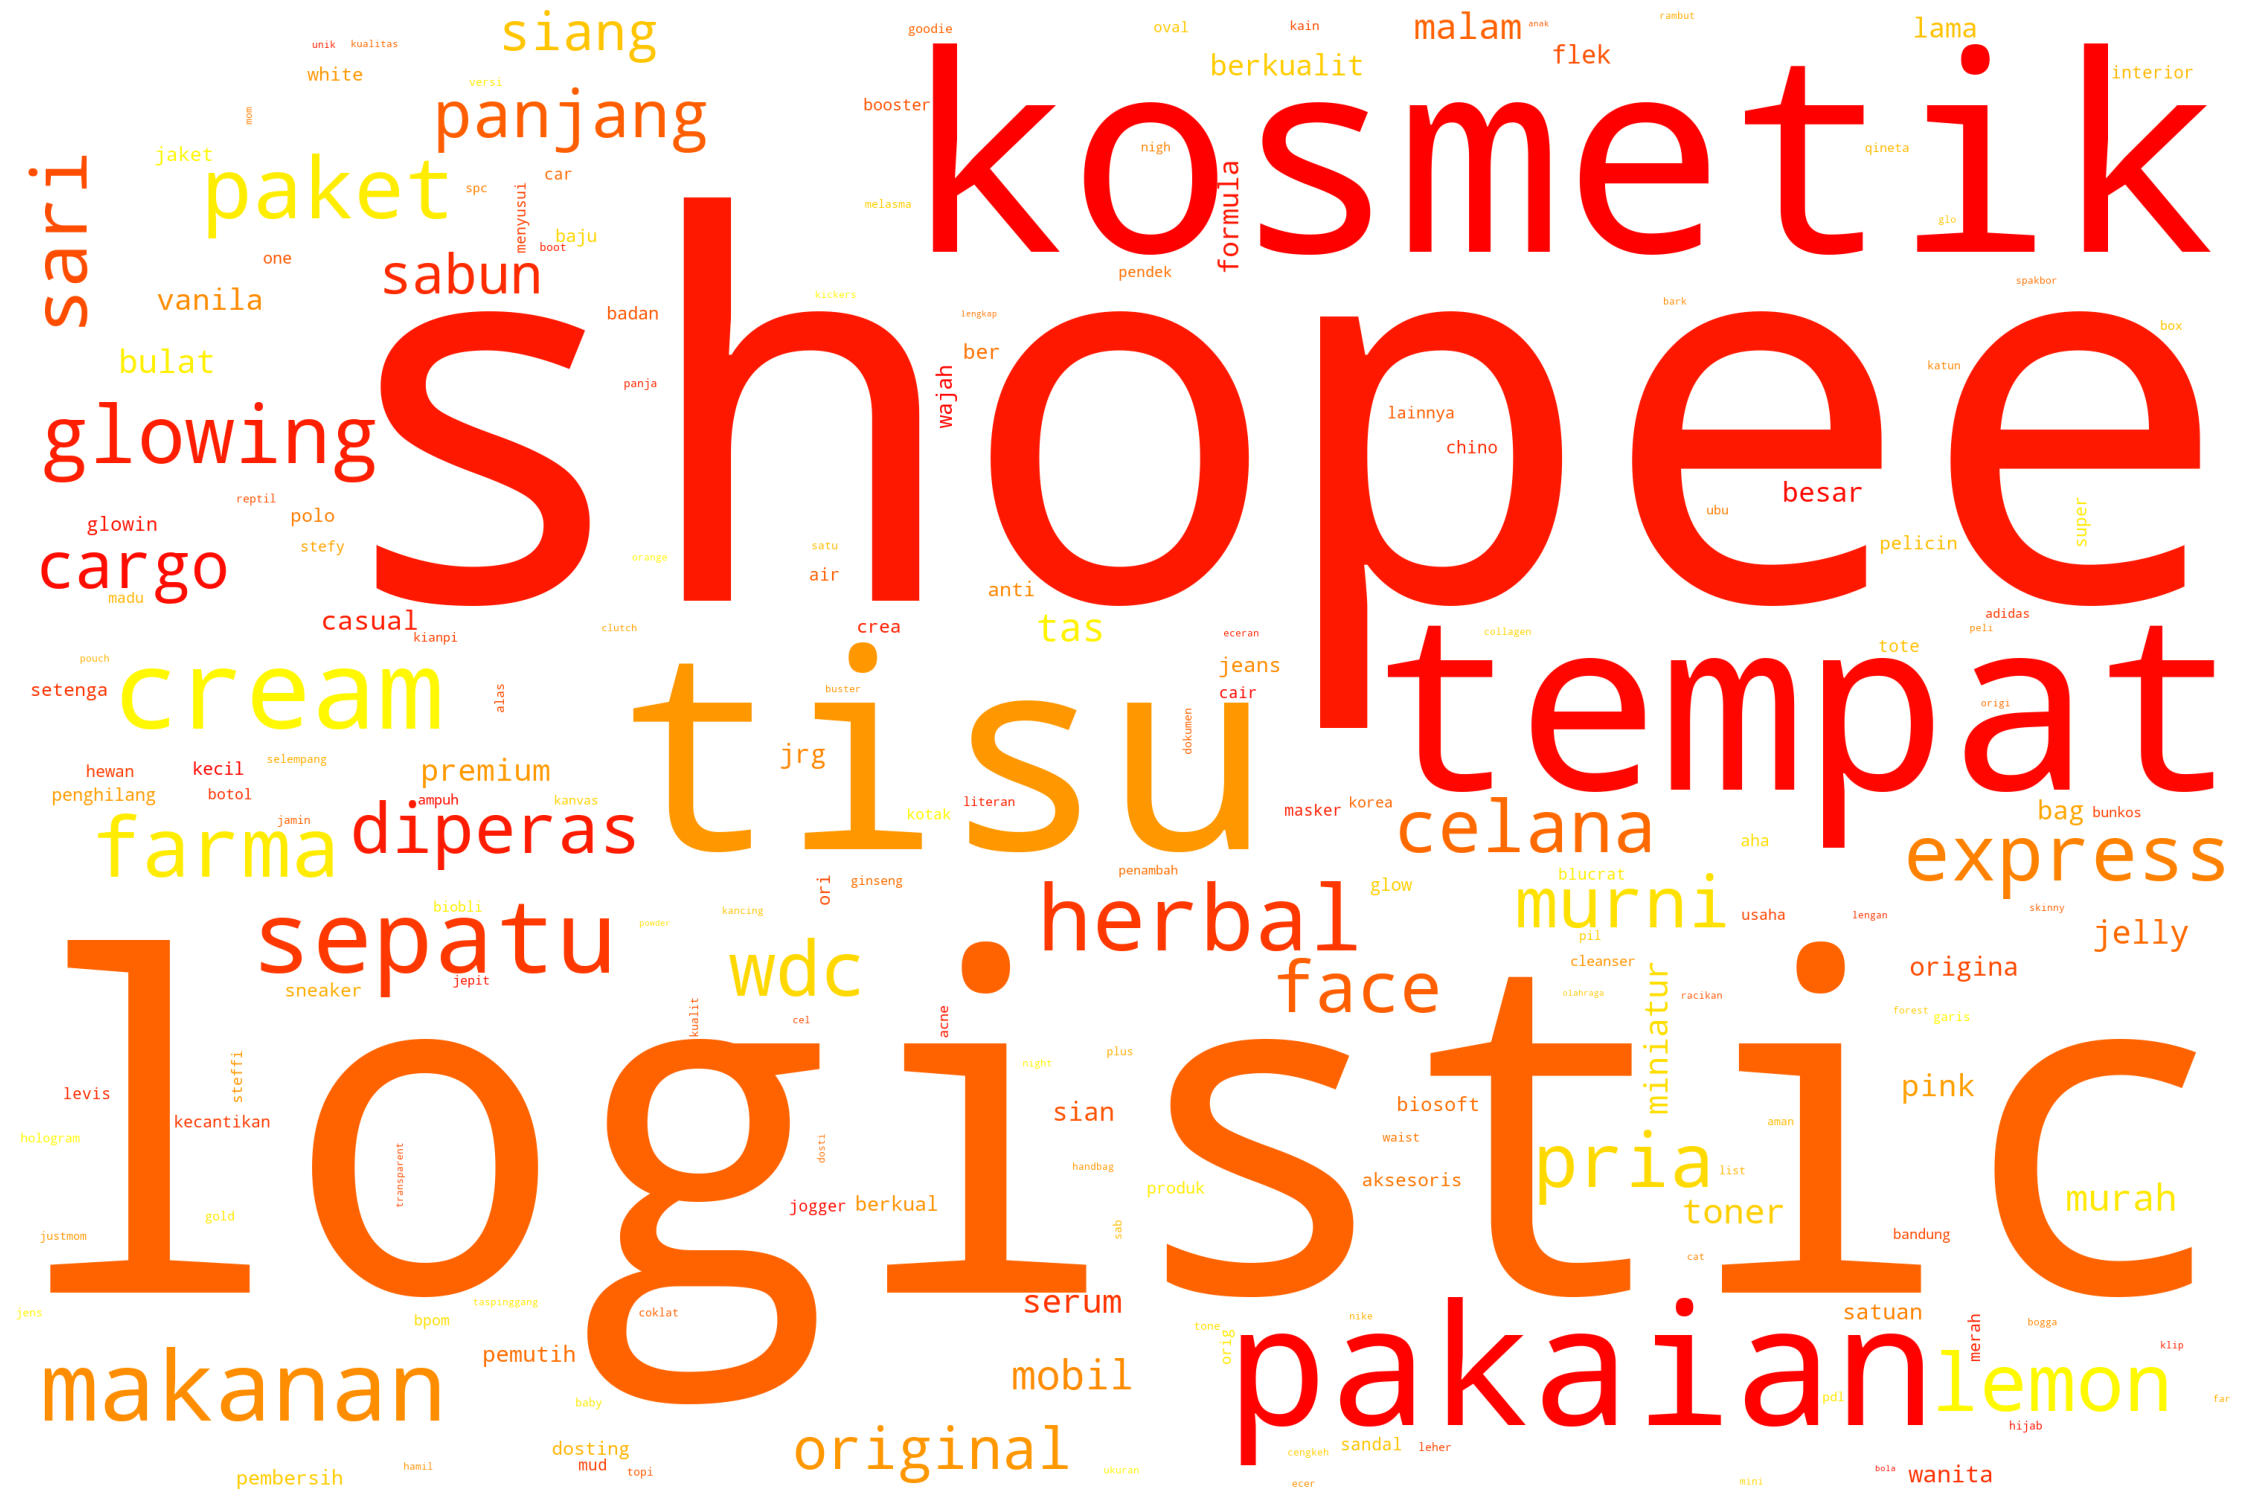

In [315]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

# Generate word cloud
text = ' '.join(word for word in df['Goods desc'])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='autumn', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

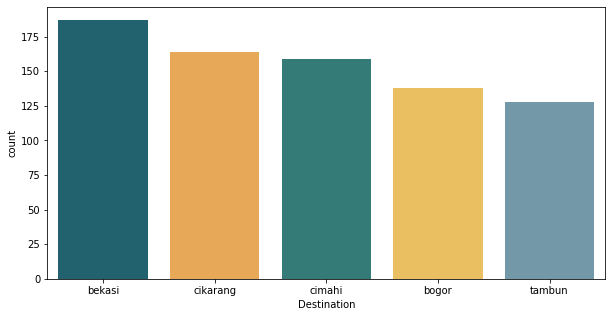

In [313]:
daerah=df.loc[df['Destination']!='pasar']
fig = plt.figure(figsize=(10,5))
palet=sns.color_palette(["#16697a","#ffab40","#288681","#ffc84c","#6a9db2"])
sns.countplot(daerah['Destination'], order=daerah.Destination.value_counts().iloc[:5].index, palette=palet)

In [209]:
df['total_amount']=df['Amount']*df['Qty']
monthly_amount=df.groupby('Month')['total_amount'].sum().reset_index()
monthly_amount.head()

,Month,total_amount
0,April,113903.5
1,Juni,115244.5
2,Mei,111354.5


In [210]:
daily_amount=df.groupby('Date')['total_amount'].sum().reset_index()
daily_amount.head()

,Date,total_amount
0,2020-04-01,5276.0
1,2020-04-02,4694.0
2,2020-04-03,4042.0
3,2020-04-04,5831.0
4,2020-04-06,4789.5


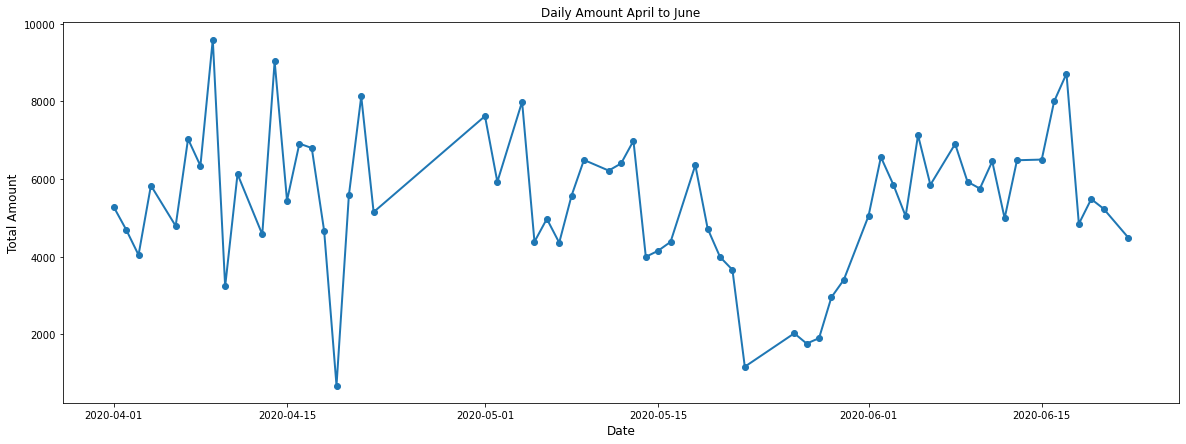

In [304]:
fig=plt.figure(figsize=(20,10))
df.groupby('Date')['total_amount'].sum().plot(marker='o',linewidth=2)
plt.title('Daily Amount April to June', loc='center')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Total Amount',fontsize=12)
plt.show()

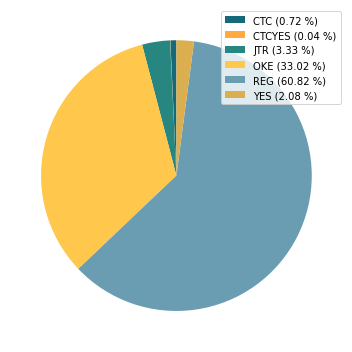

In [318]:
plt.figure(figsize=(5,5))
patches,texts=plt.pie(df.Services.str.get_dummies().sum(), startangle=90, colors=["#16697a","#ffab40","#288681","#ffc84c","#6a9db2","#dbaf50"])
labels = [r'CTC (0.72 %)',r'CTCYES (0.04 %)', 
r'JTR (3.33 %)',r'OKE (33.02 %)', r'REG (60.82 %)',r'YES (2.08 %)']
plt.legend(patches, labels, loc="best")
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

# Analytics

In [246]:
recency_df = df.groupby(by='Shipper/ Cust Id', as_index=False)['Date'].max()
recency_df.columns = ['Cust_Id','Transaksi_akhir']
recency_df.head()

,Cust_Id,Transaksi_akhir
0,AIDA,2020-06-22
1,AKEW,2020-06-22
2,BCAT,2020-06-22
3,BJE,2020-06-22
4,BOGG,2020-06-22


In [271]:
recency=[173,173,173,173,173,173,173,173,178,211,201,177,177,173,173,173,173,221,173,173,226,173,236,207,212,219,244,173,176,178,195,173,176,183]

recency_df['Recency'] = recency
recency_df.head()

,Cust_Id,Transaksi_akhir,Recency
0,AIDA,2020-06-22,173
1,AKEW,2020-06-22,173
2,BCAT,2020-06-22,173
3,BJE,2020-06-22,173
4,BOGG,2020-06-22,173


In [225]:
frequency_df = df.groupby(by=['Shipper/ Cust Id'], as_index=False)['Cnote no'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,AIDA,236
1,AKEW,432
2,BCAT,1221
3,BJE,107
4,BOGG,80


In [227]:
monetary_df = df.groupby(by='Shipper/ Cust Id',as_index=False)['total_amount'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,AIDA,10284.5
1,AKEW,12776.0
2,BCAT,19226.0
3,BJE,1812.0
4,BOGG,1531.0


In [342]:
recency_df.columns = ['CustomerID','Trx_akhir','Recency']
rfm_df = recency_df.merge(frequency_df,on='CustomerID')
rfm_df.head()

,CustomerID,Trx_akhir,Recency,Frequency
0,AIDA,2020-06-22,173,236
1,AKEW,2020-06-22,173,432
2,BCAT,2020-06-22,173,1221
3,BJE,2020-06-22,173,107
4,BOGG,2020-06-22,173,80


In [343]:
rfm_df = rfm_df.merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head()

,Trx_akhir,Recency,Frequency,Monetary
CustomerID,,,,
AIDA,2020-06-22,173,236,10284.5
AKEW,2020-06-22,173,432,12776.0
BCAT,2020-06-22,173,1221,19226.0
BJE,2020-06-22,173,107,1812.0
BOGG,2020-06-22,173,80,1531.0


In [344]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,173.0,51.50,999.50
0.50,174.5,133.00,3788.00
0.75,199.5,395.75,13463.75


In [345]:
rfm_df=rfm_df[['Recency','Frequency','Monetary']]
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
AIDA,173,236,10284.5
AKEW,173,432,12776.0
BCAT,173,1221,19226.0
BJE,173,107,1812.0
BOGG,173,80,1531.0


In [346]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
        
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [347]:
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [348]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
AIDA,173,236,10284.5,4,3,3
AKEW,173,432,12776.0,4,4,3
BCAT,173,1221,19226.0,4,4,4
BJE,173,107,1812.0,4,2,2
BOGG,173,80,1531.0,4,2,2


In [349]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
AIDA,173,236,10284.5,4,3,3,433
AKEW,173,432,12776.0,4,4,3,443
BCAT,173,1221,19226.0,4,4,4,444
BJE,173,107,1812.0,4,2,2,422
BOGG,173,80,1531.0,4,2,2,422


In [350]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
GG,173,2837,69679.5,4,4,4,444
PNJI,173,2926,48237.0,4,4,4,444
KOSM,173,1091,28368.5,4,4,4,444
BCAT,173,1221,19226.0,4,4,4,444
BS,173,584,16852.0,4,4,4,444
BUNK,173,799,15768.0,4,4,4,444
EMON,173,546,13693.0,4,4,4,444


In [351]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='134']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  7
Loyal Customers:  9
Big Spenders:  9
Almost Lost:  1
Lost Customers:  1
Lost Cheap Customers:  4


In [320]:
rfm_segmentation.loc[rfm_segmentation.RFMScore == '444']

,Recency,Frequency,Monetary,kluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
BCAT,173,1221,19226.0,3,4,4,4,444
BS,173,584,16852.0,3,4,4,4,444
BUNK,173,799,15768.0,3,4,4,4,444
EMON,173,546,13693.0,3,4,4,4,444
GG,173,2837,69679.5,2,4,4,4,444
KOSM,173,1091,28368.5,1,4,4,4,444
PNJI,173,2926,48237.0,1,4,4,4,444


In [322]:
rfm_segmentation.loc[rfm_segmentation.F_Quartile == 4]

,Recency,Frequency,Monetary,kluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
AKEW,173,432,12776.0,3,4,4,3,443
BCAT,173,1221,19226.0,3,4,4,4,444
BS,173,584,16852.0,3,4,4,4,444
BUNK,173,799,15768.0,3,4,4,4,444
EMON,173,546,13693.0,3,4,4,4,444
GG,173,2837,69679.5,2,4,4,4,444
KOSM,173,1091,28368.5,1,4,4,4,444
PNJI,173,2926,48237.0,1,4,4,4,444
RTIF,176,1202,36036.0,1,2,4,4,244


In [328]:
rfm_segmentation.loc[rfm_segmentation.F_Quartile == 4]

,Recency,Frequency,Monetary,kluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
AKEW,173,432,12776.0,3,4,4,3,443
BCAT,173,1221,19226.0,3,4,4,4,444
BS,173,584,16852.0,3,4,4,4,444
BUNK,173,799,15768.0,3,4,4,4,444
EMON,173,546,13693.0,3,4,4,4,444
GG,173,2837,69679.5,2,4,4,4,444
KOSM,173,1091,28368.5,1,4,4,4,444
PNJI,173,2926,48237.0,1,4,4,4,444
RTIF,176,1202,36036.0,1,2,4,4,244


In [334]:
rfm_segmentation.loc[rfm_segmentation.RFMScore == '134']

,Recency,Frequency,Monetary,kluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
NDRI,207,287,17735.5,3,1,3,4,134


In [337]:
rfm_segmentation.loc[rfm_segmentation.RFMScore == '111']

,Recency,Frequency,Monetary,kluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
CCDS,211,6,108.0,0,1,1,1,111
CHAM,201,9,280.0,0,1,1,1,111
PARE,219,1,12.0,0,1,1,1,111
PJUL,244,1,160.0,0,1,1,1,111
